<a href="https://colab.research.google.com/github/kleeresearch/TextAnalysis/blob/master/Course/Day3/13_KMeans_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day3/python_code/cluster_example_data.csv')

In [5]:
data

,size,age,id
0,34,5,0
1,25,5,1
2,30,2,2
3,38,20,3
4,44,12,4
5,48,18,5
6,52,22,6
7,60,19,7
8,34,18,8
9,34,22,9


In [6]:
X = data.values

In [7]:
X.shape

(26, 3)

In [8]:
X

array([[34,  5,  0],
       [25,  5,  1],
       [30,  2,  2],
       [38, 20,  3],
       [44, 12,  4],
       [48, 18,  5],
       [52, 22,  6],
       [60, 19,  7],
       [34, 18,  8],
       [34, 22,  9],
       [25, 18, 10],
       [25, 15, 11],
       [24, 10, 12],
       [30,  3, 13],
       [40,  3, 14],
       [44,  2, 15],
       [48,  4, 16],
       [52,  4, 17],
       [60,  2, 18],
       [25,  3, 19],
       [52,  4, 20],
       [34, 15, 21],
       [48,  5, 22],
       [44,  8, 23],
       [52,  2, 24],
       [52, 10, 25]])

In [9]:
X = X[:,:-1]

In [10]:
X

array([[34,  5],
       [25,  5],
       [30,  2],
       [38, 20],
       [44, 12],
       [48, 18],
       [52, 22],
       [60, 19],
       [34, 18],
       [34, 22],
       [25, 18],
       [25, 15],
       [24, 10],
       [30,  3],
       [40,  3],
       [44,  2],
       [48,  4],
       [52,  4],
       [60,  2],
       [25,  3],
       [52,  4],
       [34, 15],
       [48,  5],
       [44,  8],
       [52,  2],
       [52, 10]])

In [11]:
import matplotlib.pyplot as plt

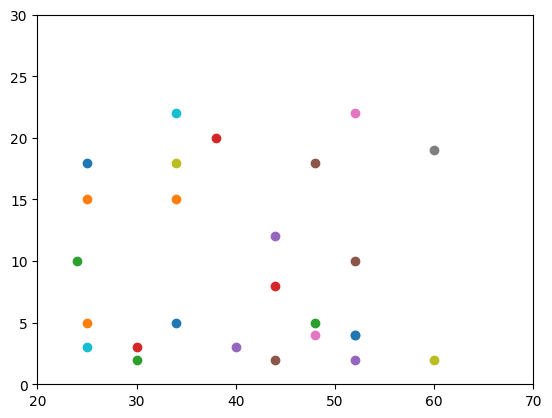

In [12]:
for V in X:
    plt.scatter(V[0],V[1])
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

In [13]:
from sklearn.cluster import KMeans

In [28]:
# cluster 수는 연구자가 정하기
kmeans = KMeans(n_clusters=4) # KMeans 알고리즘 생성

k값을 정할 때 sillouette score 혹은 elbow 방법을 사용한다. 실루엣 스코어가 엘보우가 더 많이 사용된다.

실루엣 스코어는 취하는 값이 1에서 -1이 된다. 이 값이 클수록 군집화가 잘 되었다는 것을 의미한다. 이 값은 같은 군집에 속해 있는 관측치들 간의 유사도와 서로 같은 관측치의 유사도에 따라 결정된다. 벡터들 간의 유사도는 크고 반대로 서로 다른 군집에 속해 있는 관측치들 간의 유사도가 작은 경우에는 실루엣 스코어가 커지게 된다. 같른 군집에 속해서 크며 클수록 유사도가 작으면 작을수록 군집화가 잘 되었다. 실루엣 스코어 값에 가까우면 가까울수록 군집화 분석이 잘 되었다. k값을 여러개 시도해 본 다음에 실루엣 스코어 값이 가장 큰 경우를 k 값으로 설정하면 된다.

In [29]:
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
clusters

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0], dtype=int32)

첫번째 관측치들이 속한 군집의 결과.

In [31]:
cluster_nums = []
for doc_num, cluster_num in enumerate(clusters):
    cluster_nums.append(cluster_num)


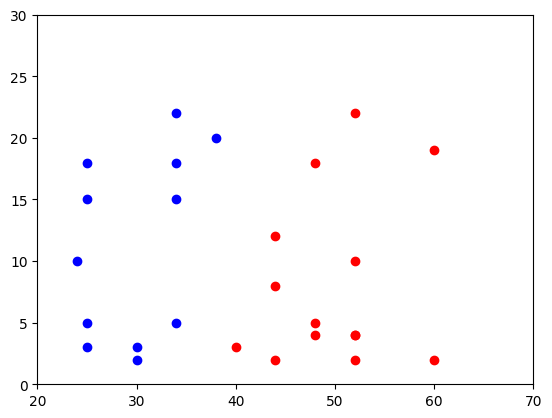

In [32]:
for k in range(len(X)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0],X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0],X[k][1], c='blue')
    elif cluster_nums[k] == 2:
        plt.scatter(X[k][0],X[k][1], c='green')
    elif cluster_nums[k] == 3:
        plt.scatter(X[k][0],X[k][1], c='yellow')
    elif cluster_nums[k] == 4:
        plt.scatter(X[k][0],X[k][1], c='black')
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

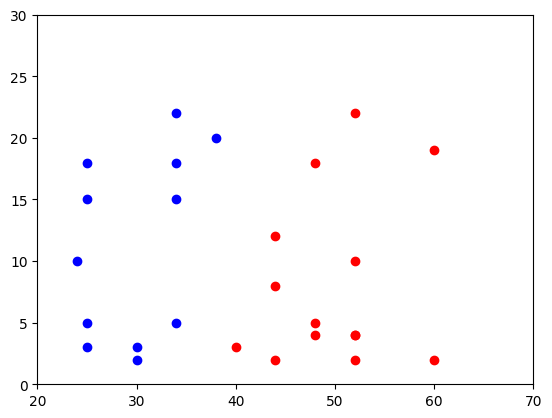

In [33]:
# 군집의 수 = 4 인 경우
for k in range(len(X)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0],X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0],X[k][1], c='blue')
    elif cluster_nums[k] == 2:
        plt.scatter(X[k][0],X[k][1], c='green')
    elif cluster_nums[k] == 3:
        plt.scatter(X[k][0],X[k][1], c='yellow')
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

실루엣 값을 2와 8사이로 지정하고 10번 반복해서 실루엣 스코어를 출력한다.

이 결과에 따르면 k가 2일 때 실루엣 스코어가 크다.


실루엣 스코엇은 간단하다. 엘보우는 주성분 분석에서 가장 급하게 꺾이는 부분이 애매한 경우가 많기 때문이다. 주관적으로

In [34]:
from sklearn.metrics import silhouette_score
for k in range(2,8):
    kmeans = KMeans(n_clusters=k, max_iter=10)
    cluster = kmeans.fit_predict(X)
    print(k, silhouette_score(X, cluster))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 0.4767950237806064
3 0.4461204276924567
4 0.4765732552945714
5 0.4273190443623125


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 0.44120254711620566
7 0.4366859720160812


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
